In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates  
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 13
plt.rcParams['lines.linewidth'] = 2

In [2]:
def read(file_name = None,sheet=None):
    df = pd.read_excel(file_name,sheet_name=sheet)
    time = pd.DatetimeIndex(pd.to_datetime(df[['year',
                                       'month',
                                       'day']]).astype(str)+' '+
                    df['hr'].astype(str)+':'+df['min'].astype(str))
    df['time'] = time
    df.set_index(time,inplace=True)
    df.drop(['year','month','day','hr','min','time'],axis=1,inplace= True)
    df.filter(like='n').replace(0,np.nan,inplace=True)
    df.interpolate(inplace=True)
    print(df.columns)
    print(df.describe())
    return df

In [3]:
df1 = read(file_name='TEST_daa.xlsx',sheet=1)

Index(['u80', 'u82', 'u84', 'u86', 'u88', 'u90', 'u92', 'u94', 'u96', 'u98',
       'u100', 'v80', 'v82', 'v84', 'v86', 'v88', 'v90', 'v92', 'v94', 'v96',
       'v98', 'v100', 'n80', 'n82', 'n84', 'n86', 'n88', 'n90', 'n92', 'n94',
       'n96', 'n98', 'n100'],
      dtype='object')
               u80          u82          u84          u86          u88  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean     -0.138636     0.809922     1.606124     1.862954     1.369976   
std      28.122818    29.189418    30.734995    32.121705    33.232891   
min     -91.594109  -100.857918  -130.438232  -120.222427  -112.370163   
25%     -19.691690   -19.049620   -18.721230   -19.340676   -19.921067   
50%       1.097372     2.313200     4.163214     4.292918     3.497938   
75%      20.004913    21.980374    23.304762    24.923391    25.333426   
max      86.542068    97.556656   116.002213   109.540665   125.726082   

               u90          u92          u94    

In [4]:
df1

,u80,u82,u84,u86,u88,u90,u92,u94,u96,u98,...,n82,n84,n86,n88,n90,n92,n94,n96,n98,n100
2015-01-01 00:00:00,45.136673,41.282463,23.283382,17.971977,13.714012,9.121774,11.204283,14.091898,14.093170,14.174073,...,157.0,255.0,423.0,625.0,853.0,915.0,753.0,566.0,357.0,162.0
2015-01-01 01:00:00,51.443798,42.304710,46.056446,47.891186,43.734024,33.502422,24.780729,18.611849,15.064353,13.228299,...,138.0,257.0,395.0,576.0,800.0,941.0,896.0,688.0,425.0,242.0
2015-01-01 02:00:00,47.435257,38.499382,38.001457,42.224510,45.182812,38.994915,30.115494,23.757467,20.722841,8.284076,...,152.0,273.0,405.0,543.0,771.0,955.0,932.0,728.0,459.0,278.0
2015-01-01 03:00:00,33.097820,31.293791,29.918661,29.718151,30.320602,28.365904,28.597363,27.891420,22.841158,10.202868,...,158.0,214.0,351.0,496.0,606.0,729.0,798.0,695.0,456.0,244.0
2015-01-01 04:00:00,28.521860,19.583357,14.754774,15.501157,10.812589,11.274263,19.201389,9.204091,-11.845824,-30.502678,...,149.0,211.0,298.0,403.0,498.0,556.0,570.0,525.0,385.0,217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,17.664930,6.256207,4.749742,3.606913,7.988280,5.446365,-0.891765,0.016222,4.756553,11.439422,...,114.0,183.0,272.0,334.0,377.0,445.0,443.0,313.0,157.0,76.0
2015-12-31 20:00:00,22.707071,16.577116,21.353758,27.065983,33.973919,33.871834,29.124353,31.153164,26.751081,22.604853,...,100.0,144.0,222.0,294.0,375.0,469.0,494.0,483.0,342.0,167.0
2015-12-31 21:00:00,25.401672,19.069824,29.078941,40.459110,46.869789,48.244347,43.192009,39.389637,34.210529,31.147245,...,90.0,135.0,202.0,355.0,483.0,602.0,697.0,666.0,436.0,174.0
2015-12-31 22:00:00,51.373829,22.798862,29.985949,43.731674,55.349201,52.375309,42.964443,35.869976,28.008921,18.317854,...,94.0,186.0,323.0,455.0,629.0,815.0,869.0,678.0,373.0,172.0


In [10]:
u = df1[['u80', 'u82', 'u84', 'u86', 'u88', 'u90', 'u92', 'u94', 'u96', 'u98',
       'u100']]

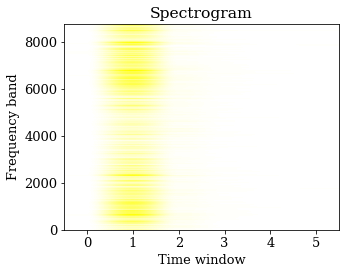

In [11]:
from scipy import signal
freqs, times, spectrogram = signal.spectrogram(u,fs = 1/len(u))
plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

In [12]:
from __future__ import division
from matplotlib import pyplot
import pycwt as wavelet
from pycwt.helpers import find

In [14]:
title = 'Zonal Wind'
label = 'u80'
units = 'm/s'
fs = 24

dat = u.iloc[:,0]
t0 = 0
dt = 1/fs  # In years
N = len(dat)
t = np.arange(0, N)* dt + t0

p = np.polyfit(t - t0, dat, 1)
dat_notrend = dat - np.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset

In [15]:
mother = wavelet.Morlet(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 / 10  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm.values, dt, dj, s0, J,
                                                      mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

power = (np.abs(wave)) ** 2
fft_power = np.abs(fft) ** 2
period = 1 / freqs


power /= scales[:, None]

signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = np.ones([1, N]) * signif[:, None]
sig95 = power / sig95

glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

sel = find((period >= 0.15) & (period < 1.8))
Cdelta = mother.cdelta
scale_avg = (scales * np.ones((N, 1))).transpose()
scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
                                             significance_level=0.95,
                                             dof=[scales[sel[0]],
                                                  scales[sel[-1]]],
                                             wavelet=mother)

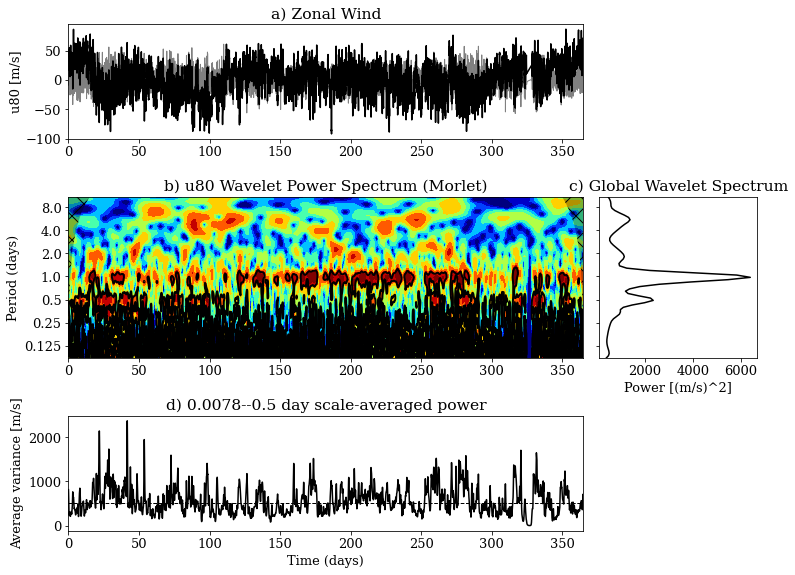

In [16]:
# Prepare the figure
plt.close('all')
plt.ioff()
figprops = dict(figsize=(11, 8), dpi=72)
fig = plt.figure(**figprops)

# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = plt.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, dat, 'k', linewidth=1.5)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = plt.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, np.log2(period), np.log2(power), np.log2(levels),
            extend='both', cmap=plt.cm.jet)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, np.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(np.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                           np.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (days)')
#
Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                           np.ceil(np.log2(period.max())))
bx.set_yticks(np.log2(Yticks))
bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = plt.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
# cx.plot(glbl_signif, np.log2(period), 'k--')
# cx.plot(var * fft_theor, np.log2(period), '--', color='#cccccc')
# cx.plot(var * fft_power, np.log2(1./fftfreqs), '-', color='#cccccc',
#         linewidth=1.)
cx.plot(var * glbl_power, np.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
# cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(np.log2([period.min(), period.max()]))
cx.set_yticks(np.log2(Yticks))
cx.set_yticklabels(Yticks)
plt.setp(cx.get_yticklabels(), visible=False)

# Fourth sub-plot, the scale averaged wavelet spectrum.
dx = plt.axes([0.1, 0.07, 0.65, 0.2], sharex=ax)
dx.axhline(scale_avg_signif, color='k', linestyle='--', linewidth=1.)
dx.plot(t, scale_avg, 'k-', linewidth=1.5)
dx.set_title('d) {}--{} day scale-averaged power'.format(0.0078, 0.5))
dx.set_xlabel('Time (days)')
dx.set_ylabel(r'Average variance [{}]'.format(units))
ax.set_xlim([t.min(), t.max()])
plt.show()